<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [14]:
import matplotlib.pyplot as plt

matplotlib inline

SyntaxError: invalid syntax (<ipython-input-14-3dea566c69fe>, line 3)

In [289]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [290]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column


In [291]:
X.notnull().count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
dtype: int64

In [292]:
X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [293]:
X.describe(include="all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [294]:
X.shape

(506, 13)

In [295]:
X.CRIM.unique().shape

(504,)

In [296]:
X.ZN.unique().shape

(26,)

In [297]:
X.INDUS.unique().shape

(76,)

In [298]:
X.CHAS.unique().shape

(2,)

In [299]:
X.NOX.unique().shape

(81,)

In [300]:
X.RM.unique().shape

(446,)

In [301]:
X.AGE.unique().shape

(356,)

In [302]:
X.DIS.unique().shape

(412,)

In [303]:
X.RAD.unique().shape

(9,)

In [304]:
X.TAX.unique().shape

(66,)

In [305]:
X.PTRATIO.unique().shape

(46,)

In [306]:
X.B.unique().shape

(357,)

In [307]:
X.LSTAT.unique().shape

(455,)

## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [308]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


#Predictors: CRIM, DIS, AGE

In [309]:

X_CRIM = X.CRIM.to_frame()
X_DIS = X.DIS.to_frame()
X_AGE = X.AGE.to_frame()


In [310]:
linreg_CRIM = LinearRegression()
linreg_DIS = LinearRegression()
linreg_AGE = LinearRegression()

In [311]:
linreg_CRIM.fit(X_CRIM,y)
linreg_DIS.fit(X_DIS,y)
linreg_AGE.fit(X_AGE,y)

LinearRegression()

In [312]:
linreg_CRIM.predict(np.array([100]).reshape(1,-1))

array([[-17.48592162]])

In [313]:
CRIM_predictions = linreg_CRIM.predict(X_CRIM)
DIS_predictions = linreg_DIS.predict(X_DIS)
AGE_predictions = linreg_AGE.predict(X_AGE)

In [314]:
from sklearn import metrics
metrics.mean_squared_error(y, CRIM_predictions)

71.69073588196659

In [315]:
metrics.mean_squared_error(y, DIS_predictions)

79.1463415860711

In [316]:
metrics.mean_squared_error(y, AGE_predictions)

72.42398092899337

In [317]:
#CRIM has the lowest MSE
#AGE has the second lowest MSE
#DIS has the third lowest MSE

In [318]:
print(linreg_CRIM.intercept_)
print(linreg_CRIM.coef_)

[24.03310617]
[[-0.41519028]]


In [319]:
print(linreg_DIS.intercept_)
print(linreg_DIS.coef_)

[18.39008833]
[[1.09161302]]


In [320]:
print(linreg_AGE.intercept_)
print(linreg_AGE.coef_)

[30.97867776]
[[-0.12316272]]


In [321]:
CRIM_predictions_df = pd.DataFrame(CRIM_predictions)
DIS_predictions_df = pd.DataFrame(DIS_predictions)
AGE_predictions_df = pd.DataFrame(AGE_predictions)

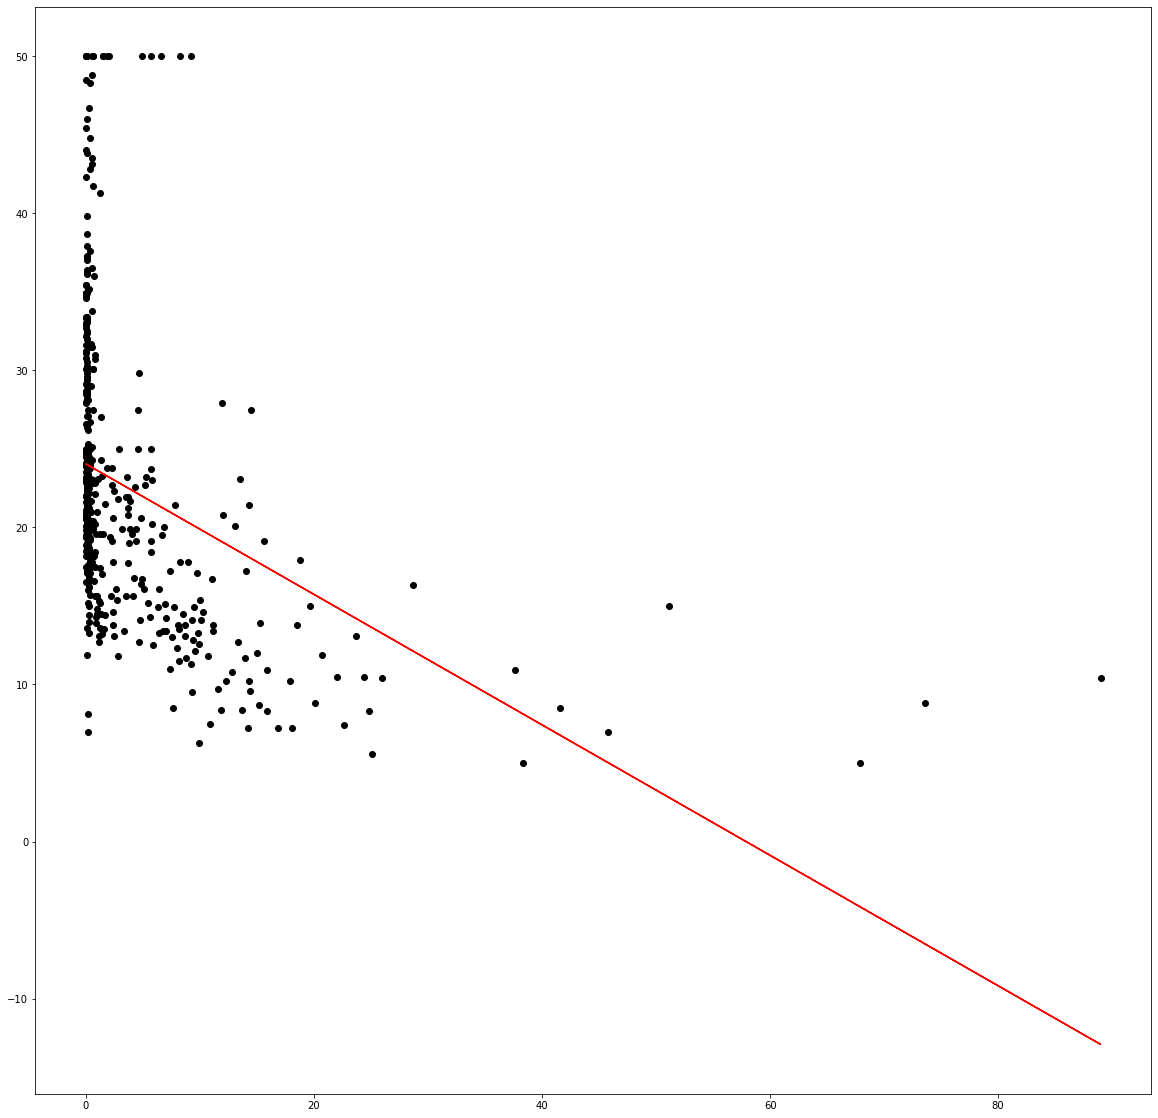

In [322]:
fig = plt.figure(figsize=(20,20))
plot = fig.add_subplot(111)
ax = plt.gca()
ax.scatter(x= X_CRIM, y= y, c='k')
ax.plot(X_CRIM, CRIM_predictions, color='r');

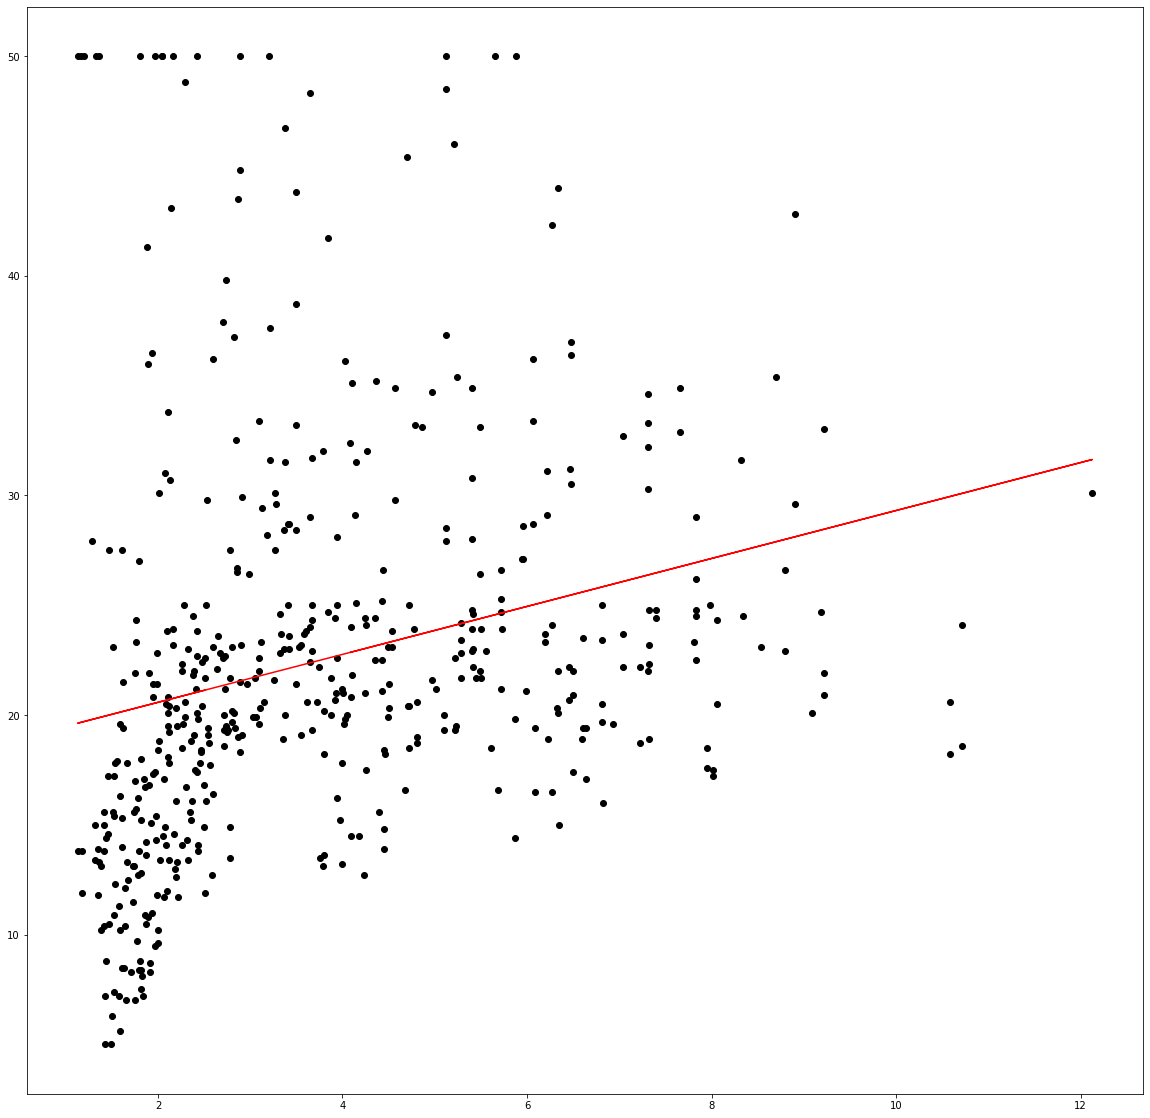

In [323]:
fig = plt.figure(figsize=(20,20))
plot = fig.add_subplot(111)
ax = plt.gca()
ax.scatter(x= X_DIS, y= y, c='k')
ax.plot(X_DIS, DIS_predictions, color='r');

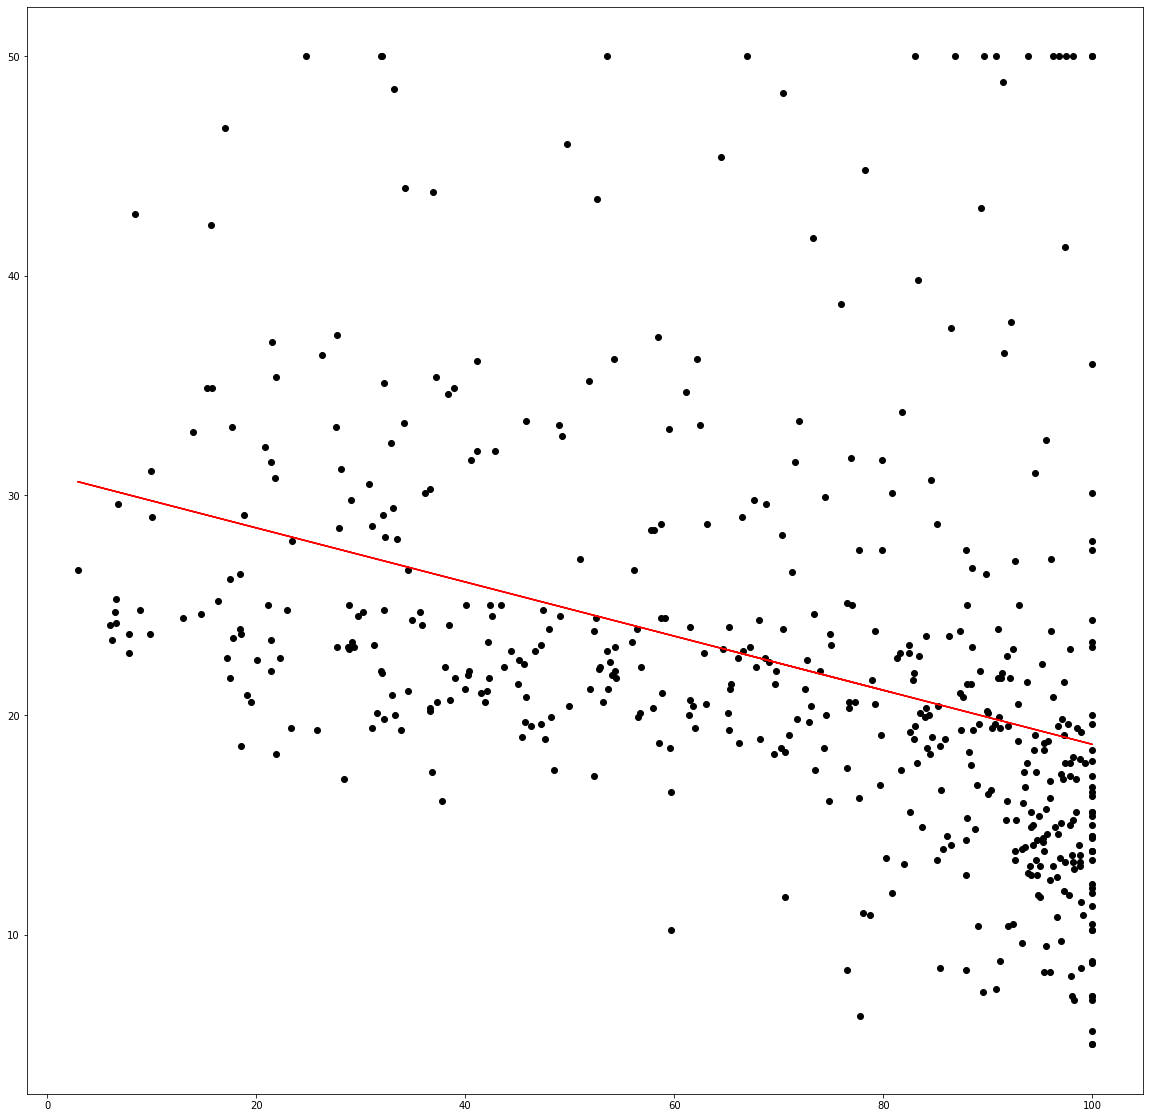

In [324]:
fig = plt.figure(figsize=(20,20))
plot = fig.add_subplot(111)
ax = plt.gca()
ax.scatter(x= X_AGE, y= y, c='k')
ax.plot(X_AGE, AGE_predictions, color='r');

In [325]:
#AGE and CRIME have a negative relationship with home price, meaning that as age and crime increase, home price decreases
#Distance has a positive relationship with home price, meaning that as Distance increase, home price increases

### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [326]:
from sklearn.model_selection import train_test_split

In [327]:
XCRIM30_train, XCRIM30_test, yCRIM30_train, yCRIM30_test = train_test_split(X_CRIM, y, test_size = .3,random_state = 1)
XDIS30_train, XDIS30_test, yDIS30_train, yDIS30_test = train_test_split(X_DIS, y, test_size = .3,random_state = 1)
XAGE30_train, XAGE30_test, yAGE30_train, yAGE30_test = train_test_split(X_AGE, y, test_size = .3,random_state = 1)

In [328]:
linregCRIM30 = LinearRegression()
linregDIS30 = LinearRegression()
linregAGE30 = LinearRegression()

linregCRIM30.fit(XCRIM30_train,yCRIM30_train)
linregDIS30.fit(XDIS30_train,yDIS30_train)
linregAGE30.fit(XAGE30_train,yAGE30_train)

yPredCRIM30 = linregCRIM30.predict(XCRIM30_test)
yPredDIS30 = linregDIS30.predict(XDIS30_test)
yPredAGE30 = linregAGE30.predict(XAGE30_test)


print("CRIM30 MSE:",metrics.mean_squared_error(yCRIM30_test,yPredCRIM30))
print("DIS30 MSE:",metrics.mean_squared_error(yDIS30_test,yPredDIS30))
print("AGE30 MSE:",metrics.mean_squared_error(yAGE30_test,yPredAGE30))

CRIM30 MSE: 80.67297029010638
DIS30 MSE: 91.40345570990517
AGE30 MSE: 86.89920583035702


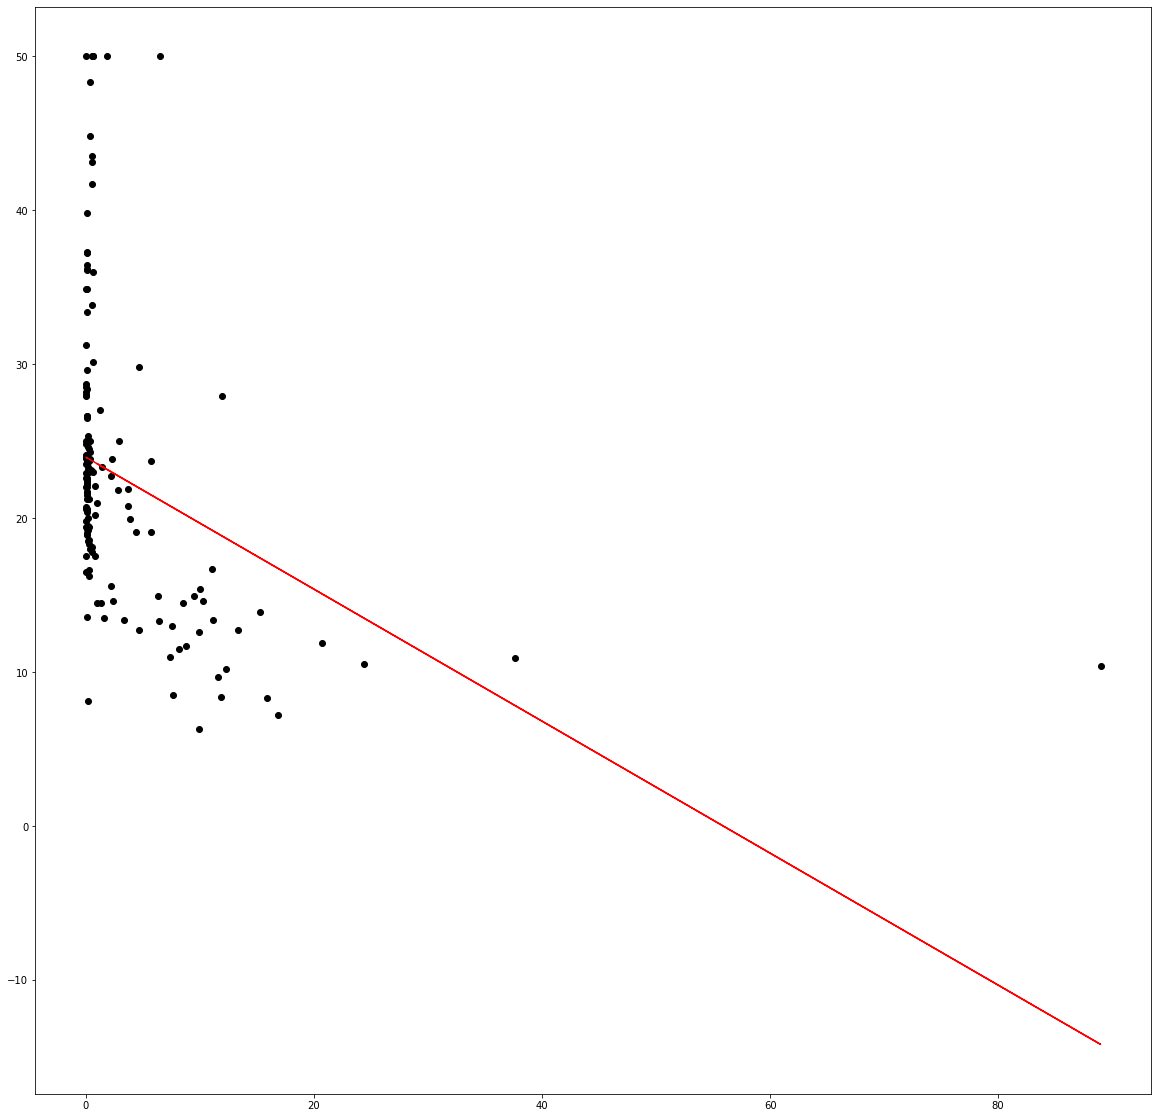

In [329]:
fig = plt.figure(figsize=(20,20))
plot = fig.add_subplot(111)
ax = plt.gca()
ax.scatter(x= XCRIM30_test, y= yCRIM30_test, c='k')
ax.plot(XCRIM30_test, yPredCRIM30, color='r');

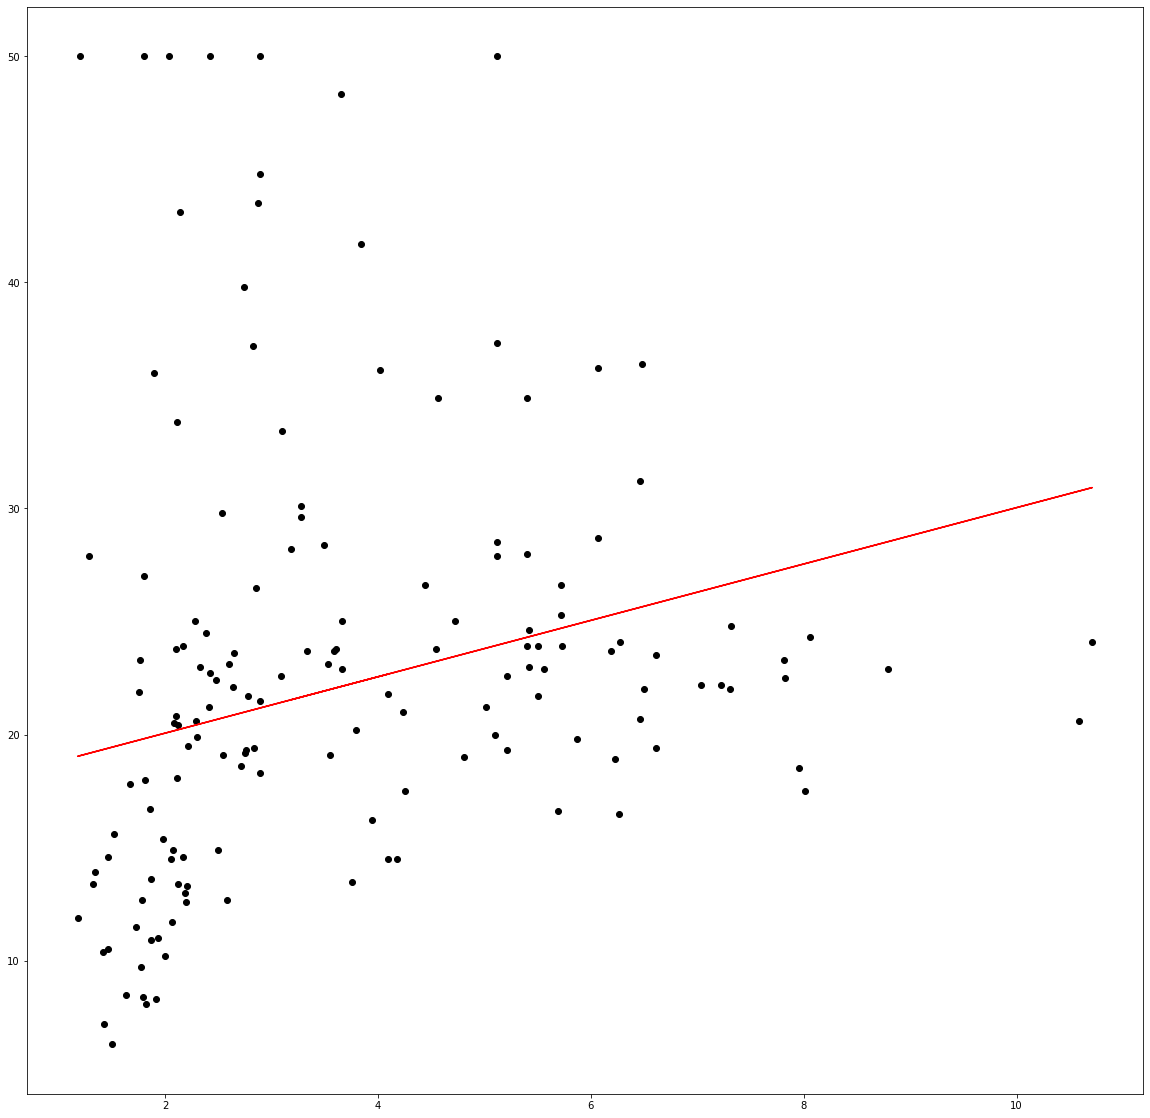

In [330]:
fig = plt.figure(figsize=(20,20))
plot = fig.add_subplot(111)
ax = plt.gca()
ax.scatter(x= XDIS30_test, y= yDIS30_test, c='k')
ax.plot(XDIS30_test, yPredDIS30, color='r');

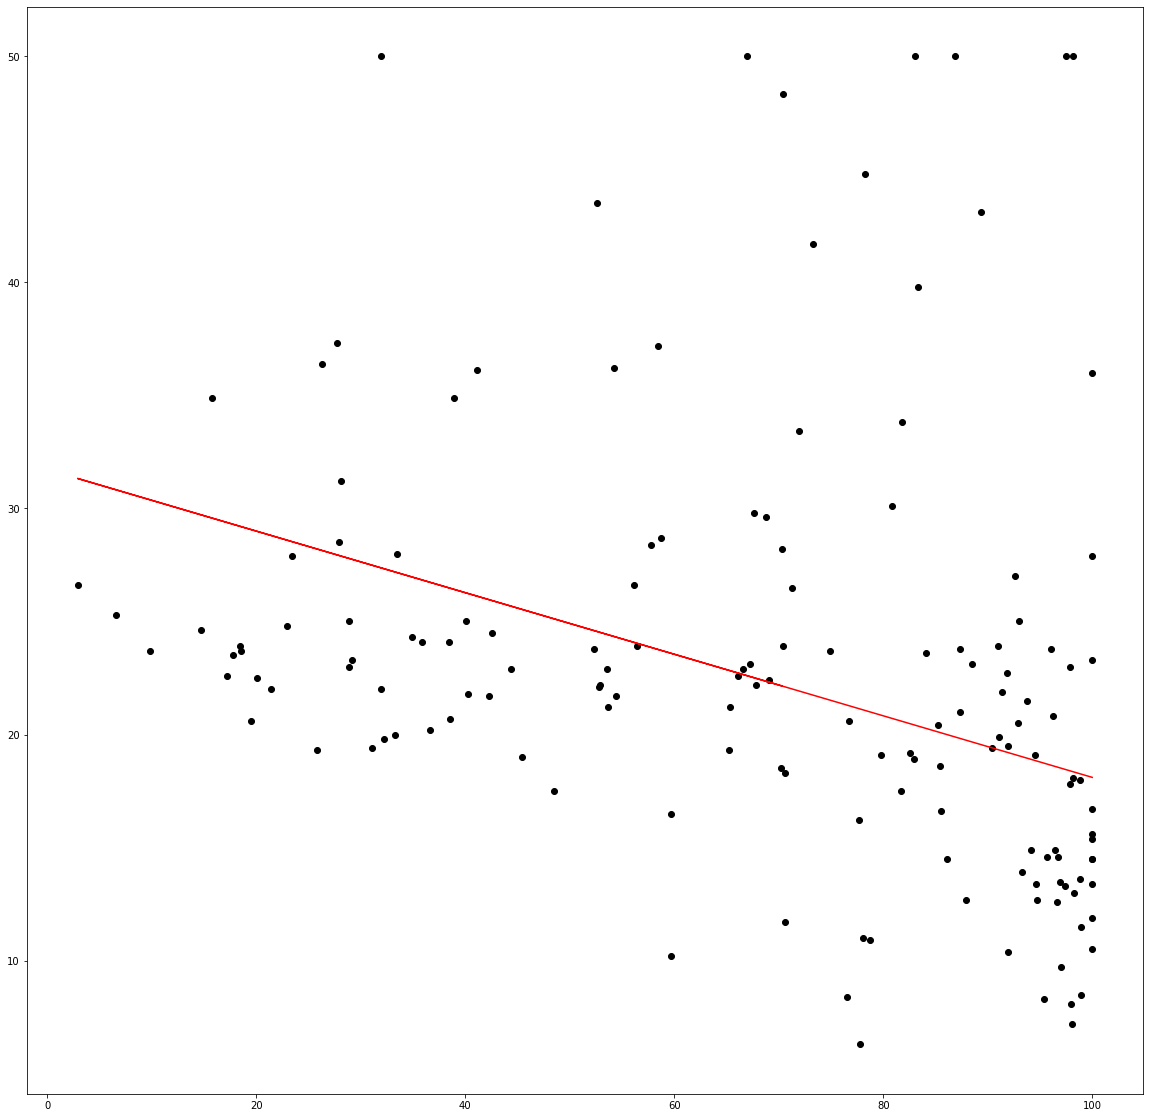

In [331]:
fig = plt.figure(figsize=(20,20))
plot = fig.add_subplot(111)
ax = plt.gca()
ax.scatter(x= XAGE30_test, y= yAGE30_test, c='k')
ax.plot(XAGE30_test, yPredAGE30, color='r');

In [332]:
XCRIM10_train, XCRIM10_test, yCRIM10_train, yCRIM10_test = train_test_split(X_CRIM, y, test_size = .1,random_state = 1)
XDIS10_train, XDIS10_test, yDIS10_train, yDIS10_test = train_test_split(X_DIS, y, test_size = .1,random_state = 1)
XAGE10_train, XAGE10_test, yAGE10_train, yAGE10_test = train_test_split(X_AGE, y, test_size = .1,random_state = 1)

linregCRIM10 = LinearRegression()
linregDIS10 = LinearRegression()
linregAGE10 = LinearRegression()

linregCRIM10.fit(XCRIM10_train,yCRIM10_train)
linregDIS10.fit(XDIS10_train,yDIS10_train)
linregAGE10.fit(XAGE10_train,yAGE10_train)

yPredCRIM10 = linregCRIM10.predict(XCRIM10_test)
yPredDIS10 = linregDIS10.predict(XDIS10_test)
yPredAGE10 = linregAGE10.predict(XAGE10_test)


print("CRIM10 MSE:",metrics.mean_squared_error(yCRIM10_test,yPredCRIM10))
print("DIS10 MSE:",metrics.mean_squared_error(yDIS10_test,yPredDIS10))
print("AGE10 MSE:",metrics.mean_squared_error(yAGE10_test,yPredAGE10))


CRIM10 MSE: 79.51245197532938
DIS10 MSE: 91.79515206583774
AGE10 MSE: 86.77531120025043


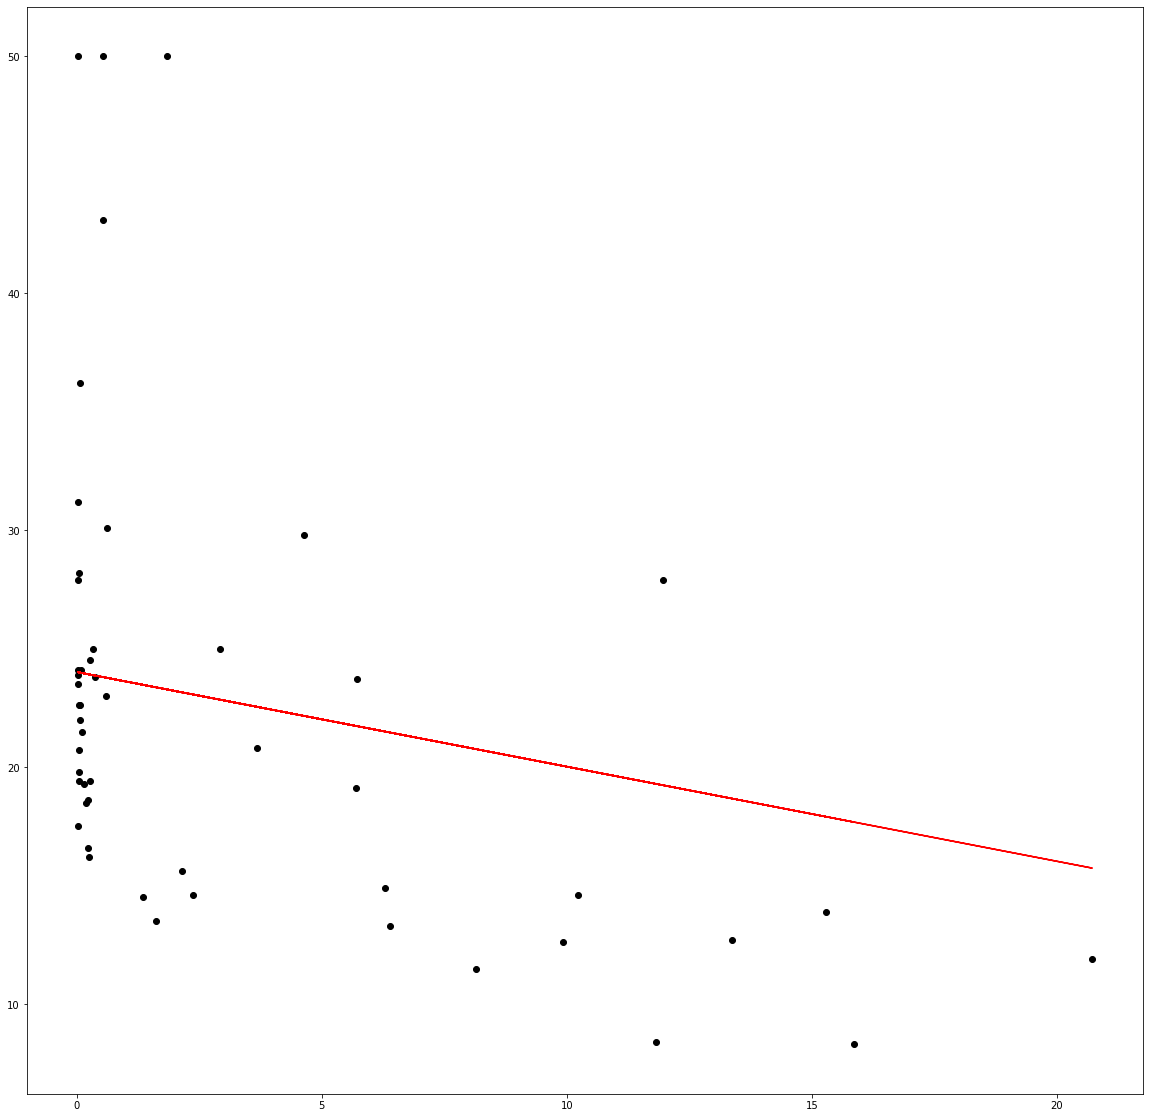

In [333]:
fig = plt.figure(figsize=(20,20))
plot = fig.add_subplot(111)
ax = plt.gca()
ax.scatter(x= XCRIM10_test, y= yCRIM10_test, c='k')
ax.plot(XCRIM10_test, yPredCRIM10, color='r');

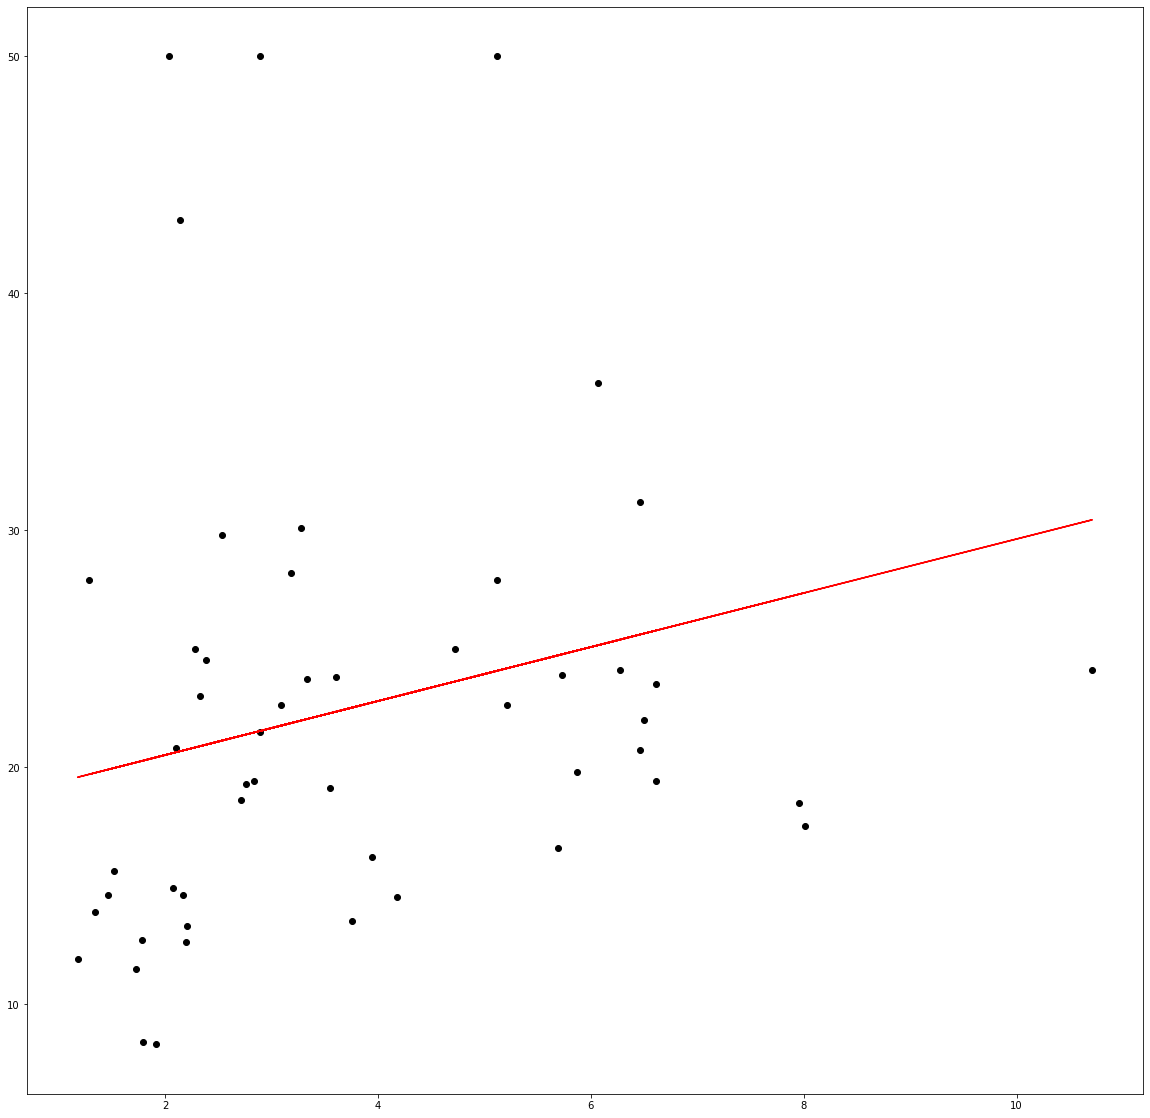

In [334]:
fig = plt.figure(figsize=(20,20))
plot = fig.add_subplot(111)
ax = plt.gca()
ax.scatter(x= XDIS10_test, y= yDIS10_test, c='k')
ax.plot(XDIS10_test, yPredDIS10, color='r');

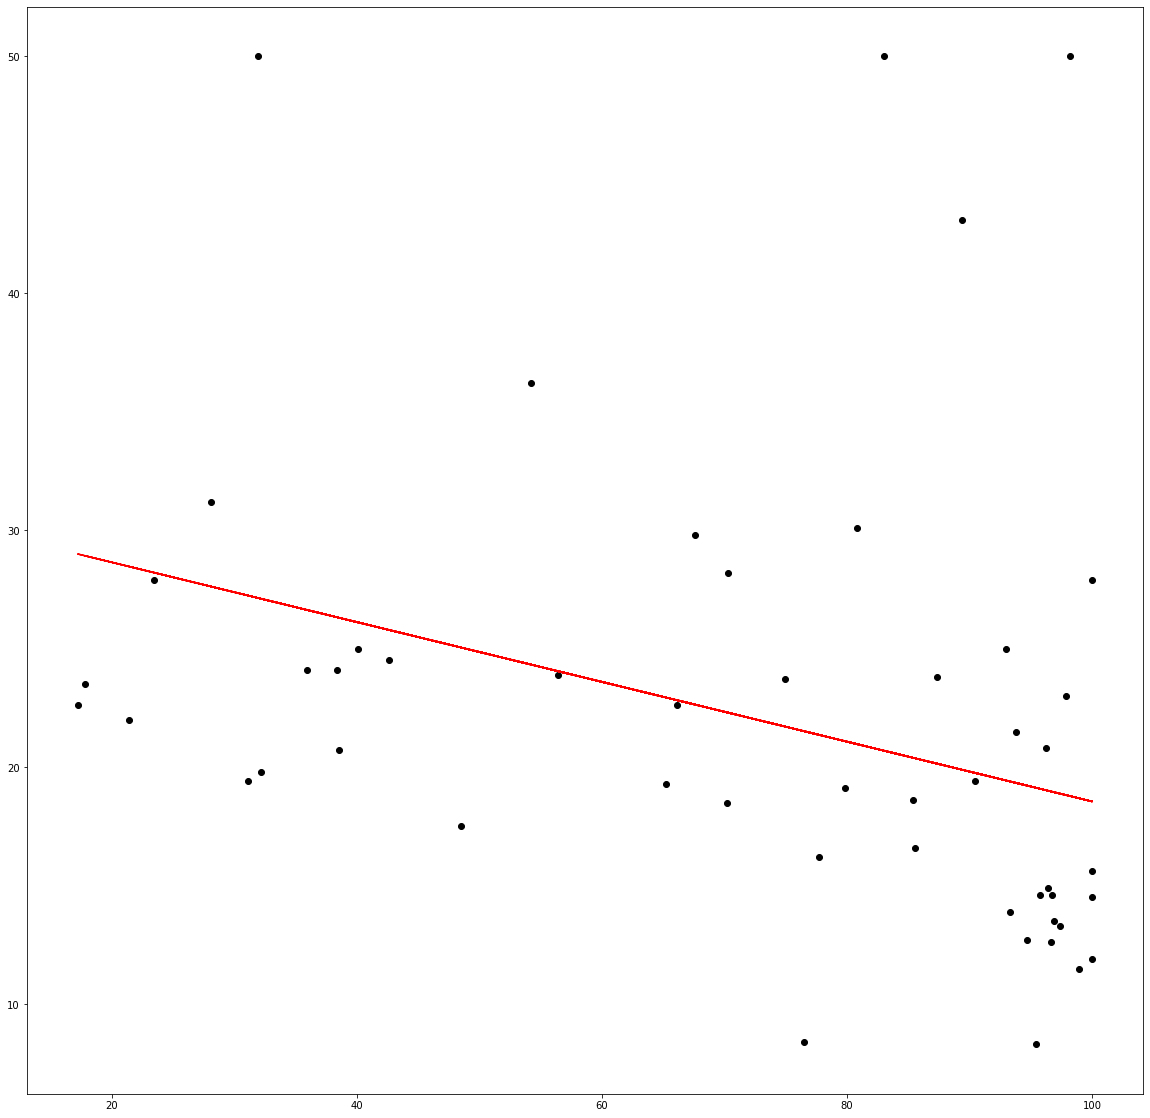

In [335]:
fig = plt.figure(figsize=(20,20))
plot = fig.add_subplot(111)
ax = plt.gca()
ax.scatter(x= XAGE10_test, y= yAGE10_test, c='k')
ax.plot(XAGE10_test, yPredAGE10, color='r');

In [336]:
#How do your metrics change? What does this tell us about the size of training/testing splits?

#Metrics @ 30% test split:
#CRIM30 MSE: 80.67297029010638
#DIS30 MSE: 91.40345570990517
#AGE30 MSE: 86.89920583035702

#Metrics @ 10% test split:
#CRIM10 MSE: 79.51245197532938
#DIS10 MSE: 91.79515206583774
#AGE10 MSE: 86.77531120025043


#There is a neglible difference between the two. Either split can be used. 

### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [337]:
from sklearn import model_selection
kf5 = model_selection.KFold(n_splits=5, shuffle=True)


In [344]:
# Create a DataFrame for both parts of data; don't forget to assign column names.
X2 = pd.DataFrame(boston.data, columns=boston.feature_names)
y2 = pd.DataFrame(boston.target, columns=['MEDV'])
boston2 = pd.concat([y, X], axis=1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=1)

In [355]:
from sklearn import model_selection
kf5 = model_selection.KFold(n_splits=5, shuffle=True)


In [356]:
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf5.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 25.4954326040092
R2: 0.7389172164452095

Model 2
MSE: 31.772439863842937
R2: 0.7336007065305855

Model 3
MSE: 25.112476114353566
R2: 0.7384966531674497

Model 4
MSE: 22.00215730212678
R2: 0.7375809961976625

Model 5
MSE: 17.156281715880965
R2: 0.7381400171384416

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 24.30775752004269
Mean of R2 for all folds: 0.7373471178958697


In [357]:
from sklearn import model_selection
kf10 = model_selection.KFold(n_splits=10, shuffle=True)

In [358]:
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf10.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 9.785892002704623
R2: 0.7400723748306273

Model 2
MSE: 19.474751857921145
R2: 0.7398111946300537

Model 3
MSE: 20.900063285546075
R2: 0.7400060361633725

Model 4
MSE: 15.95454555422726
R2: 0.7398852921943757

Model 5
MSE: 15.533612487624573
R2: 0.7399231506309609

Model 6
MSE: 20.635222306459326
R2: 0.7386088352477456

Model 7
MSE: 59.53488236115846
R2: 0.7365436615903349

Model 8
MSE: 19.222604110692444
R2: 0.7401699054715265

Model 9
MSE: 40.34136683786599
R2: 0.7385089178449148

Model 10
MSE: 17.95556262063438
R2: 0.7401928470807595

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 23.93385034248343
Mean of R2 for all folds: 0.7393722215684672


What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

10 Folds seems fine in this case. The MSE is slightly lower with 10 folds than with 5 folds (23.9 vs 24.3) and the correlation is slightly higher (.737 vs .739)

# KNN Practice

In [359]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [360]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [361]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

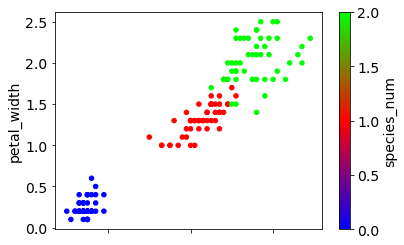

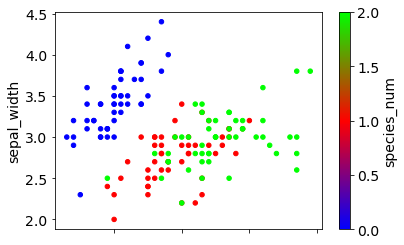

In [365]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'

# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES

# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES


iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg');
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap='brg');

## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [371]:
feature_cols = ['sepal_length','sepal_width','petal_length','petal_width']
X = iris[feature_cols]

### Create your target vector "y"
This will be the species type.

In [372]:
y = iris.species_num

### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [390]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=1)


### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [391]:
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

print(testing_error)

0.07894736842105265


### Create a Model With Five Neighbors. Did it Improve?

In [392]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
knn5 = KNeighborsClassifier(n_neighbors=5)

knn5.fit(X_train, y_train)

y_pred_class = knn5.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
testing_error = 1 - testing_accuracy

print(testing_error)

0.052631578947368474


Yes, error is lower. 

### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

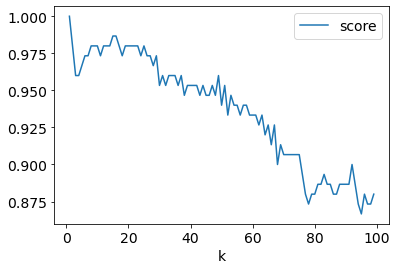

In [393]:
scores = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    pred = knn.predict(X)
    score = float(sum(pred == y)) / len(y)
    scores.append([k, score])
data = pd.DataFrame(scores,columns=['k','score'])
data.plot.line(x='k',y='score');

### According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

In [384]:
#Probability estimates; Returns the probability of the sample for each class in the model

### Can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

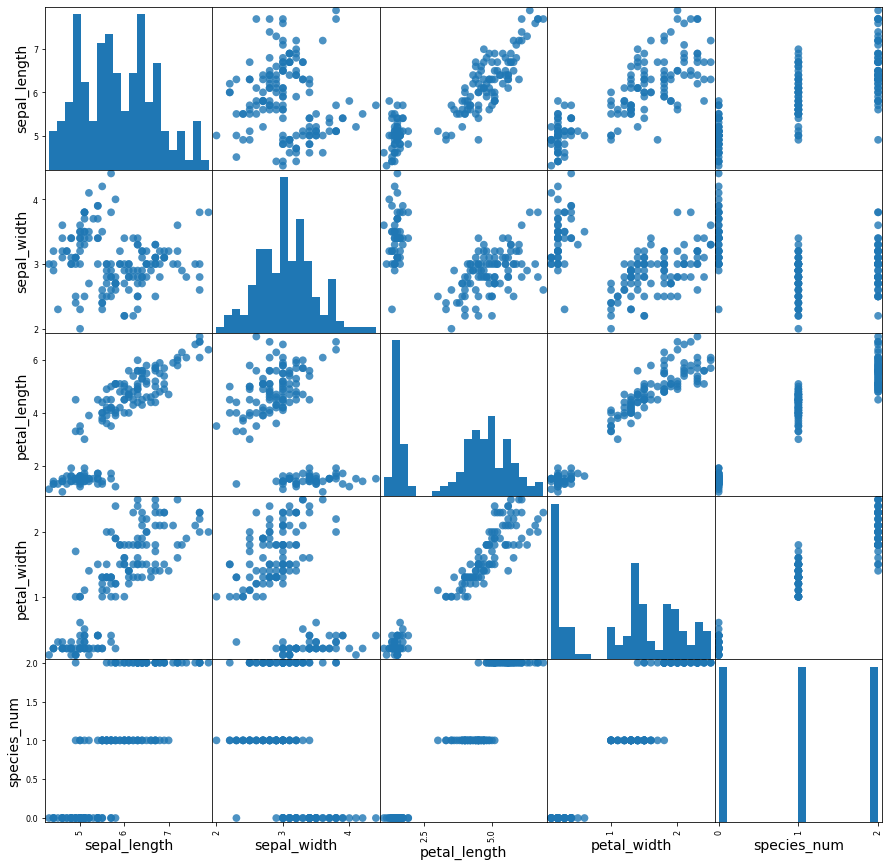

In [396]:
grr = pd.plotting.scatter_matrix(iris, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

It appears that sepal_length and petal_length are correlated with a large grouping of short petals and short sepals. Petal length increases dramatically after a sepal length of 5.5-6. 